<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_009_unequal_variance_tests_Welch's_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **What is Welch's ANOVA?**

### **Welch's ANOVA and How It Differs from Standard ANOVA**

Welch’s ANOVA (Analysis of Variance) is a statistical test used to determine whether the means of three or more groups are significantly different. It is a modification of the traditional one-way ANOVA that accounts for unequal variances and/or unequal sample sizes across groups.

---

### **How Welch's ANOVA Works**
1. **Hypotheses**:
   - **Null Hypothesis (\(H_0\))**: The means of all groups are equal.
   - **Alternative Hypothesis (\(H_1\))**: At least one group mean is significantly different from the others.

2. **Test Statistic**:
   - Welch’s ANOVA calculates a modified F-statistic based on a weighted combination of group means, variances, and sample sizes.
   - It adjusts degrees of freedom to account for unequal variances and unequal sample sizes.

---

### **Key Differences: Welch’s ANOVA vs. Standard ANOVA**

| **Aspect**                | **Standard ANOVA**                                                                 | **Welch's ANOVA**                                                            |
|---------------------------|------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Assumption of Equal Variances** | Assumes equal variances across groups (**homogeneity of variances**).                                | Does **not** assume equal variances. Handles **heterogeneous variances**.    |
| **Sample Size Sensitivity** | Sensitive to unequal group sizes, leading to biased results if variances differ.                         | Handles unequal group sizes better by adjusting for variance differences.    |
| **Degrees of Freedom**    | Uses total sample size and number of groups for degrees of freedom.                                         | Adjusts degrees of freedom using Welch-Satterthwaite approximation.         |
| **When to Use**           | Appropriate when variances are approximately equal (confirmed by Levene’s test).                         | Use when variances are unequal or sample sizes are imbalanced.              |

---

### **Why Choose Welch's ANOVA?**
1. **Robustness**:
   - Welch’s ANOVA provides accurate results even when the assumption of equal variances is violated, making it a safer choice for real-world data.

2. **Flexibility**:
   - Suitable for datasets with unequal sample sizes or heterogeneity of variances.

3. **Error Control**:
   - Reduces the risk of Type I errors (false positives) when variances differ significantly.

---

### **Limitations of Welch's ANOVA**
1. **Power**:
   - Slightly less powerful than standard ANOVA when variances are equal.
2. **Post-Hoc Testing**:
   - Requires robust post-hoc tests (e.g., Games-Howell) to handle unequal variances, rather than traditional post-hoc methods like Tukey’s HSD.

---

### **Example Use Case**
Imagine studying three different plant species with varying numbers of samples and distinct growth patterns:
- Species A: \(n = 30\), low variance.
- Species B: \(n = 15\), moderate variance.
- Species C: \(n = 25\), high variance.

Standard ANOVA may yield biased results due to the unequal variances and sample sizes. Welch’s ANOVA adjusts for these discrepancies, ensuring valid and reliable comparisons.

---

### **Summary**
- **Welch’s ANOVA** is a more robust alternative to standard ANOVA, particularly when variances and/or sample sizes are unequal.
- It helps you avoid misleading results by relaxing the assumption of equal variances.
- While slightly less powerful under ideal conditions (equal variances), it is the preferred test in more complex, real-world scenarios.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Question**  
Do the variances of `petal width` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **Levene's Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `petal width` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group's variance is different from the others.  

---

### **Analysis and Interpretation**  
- The boxplot illustrates the variability in `petal width` across the three species, with noticeable differences in the spread for each group.  
- The test statistic (\(19.89\)) indicates a significant deviation in variances between groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `petal width` differ significantly between `setosa`, `versicolor`, and `virginica`.  


Levene's Test for Equality of Variances:
Test Statistic: 19.89
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between groups.




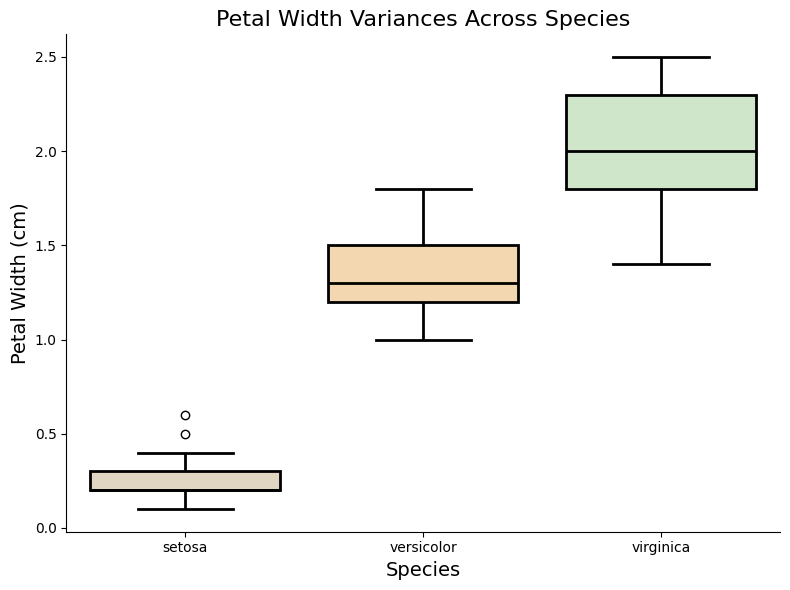

In [13]:
from scipy.stats import levene

# Extract petal width data for each species
setosa_petal_width = iris_df[iris_df['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_df[iris_df['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_df[iris_df['species'] == 'virginica']['petal width (cm)']

# Perform Levene's Test
stat, p_value = levene(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)', hue='species', palette="Pastel1_r", linewidth=2, linecolor='k')
plt.title("Petal Width Variances Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Width (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


Since the **Levene’s Test** showed a significant result (\(p = 0.0000\)), we’ve concluded that the **variances of petal width differ significantly between the species**. This violation of the equal variance assumption impacts subsequent analyses, particularly if you're comparing means.

---

### **Next Steps**
1. **Choose a Robust ANOVA Method**:
   - Since the variances are unequal across groups, **Welch’s ANOVA** is appropriate. It adjusts for unequal variances and provides a robust comparison of means across the three species.

2. **Perform Post-Hoc Analysis**:
   - If Welch’s ANOVA is significant (\(p < 0.05\)), follow up with a **Games-Howell post-hoc test** to identify which specific pairs of species have significantly different means.
   - Games-Howell is robust to unequal variances and unequal sample sizes.

3. **Visualize Group Differences**:
   - Use boxplots, KDE plots, or pairwise comparisons to highlight differences in variability and means visually.








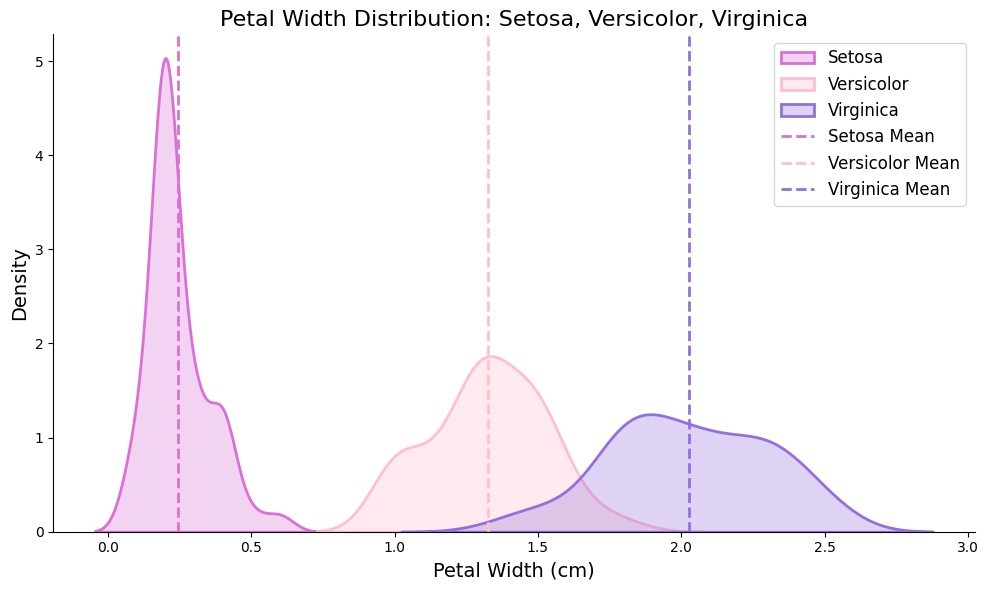

In [16]:
# KDE Plot for Group Comparisons
plt.figure(figsize=(10,6))

# KDE plots for each species
sns.kdeplot(setosa_petal_width, fill=True, alpha=0.3, linewidth=2, label="Setosa", color="orchid")
sns.kdeplot(versicolor_petal_width, fill=True, alpha=0.3, linewidth=2, label="Versicolor", color="pink")
sns.kdeplot(virginica_petal_width, fill=True, alpha=0.3, linewidth=2, label="Virginica", color="mediumpurple")

# Add vertical lines for the means of each group
plt.axvline(x=setosa_petal_width.mean(), color="orchid", linestyle="--", linewidth=2, label="Setosa Mean")
plt.axvline(x=versicolor_petal_width.mean(), color="pink", linestyle="--", linewidth=2, label="Versicolor Mean")
plt.axvline(x=virginica_petal_width.mean(), color="mediumpurple", linestyle="--", linewidth=2, label="Virginica Mean")

# Customize the plot
plt.title("Petal Width Distribution: Setosa, Versicolor, Virginica", fontsize=16)
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [6]:
# !pip install pingouin

In [7]:
import pingouin as pg

# Perform Welch's ANOVA
welch_anova = pg.welch_anova(dv='petal width (cm)', between='species', data=iris_df)

# Output results
print("Welch's ANOVA Results:")
print(welch_anova)

Welch's ANOVA Results:
    Source  ddof1      ddof2            F         p-unc       np2
0  species      2  84.951254  1276.884565  4.138739e-64  0.928883


In [9]:
# Perform Games-Howell post-hoc test
games_howell = pg.pairwise_gameshowell(dv='petal width (cm)', between='species', data=iris_df)

# Output results
print("Games-Howell Post-Hoc Results:")
games_howell

Games-Howell Post-Hoc Results:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,versicolor,0.246,1.326,-1.08,0.031690,-34.080342,74.754695,0.000000e+00,-6.763771
1,setosa,virginica,0.246,2.026,-1.78,0.041603,-42.785798,63.122624,0.000000e+00,-8.491504
2,versicolor,virginica,1.326,2.026,-0.70,0.047862,-14.625367,89.043375,1.421085e-14,-2.902630


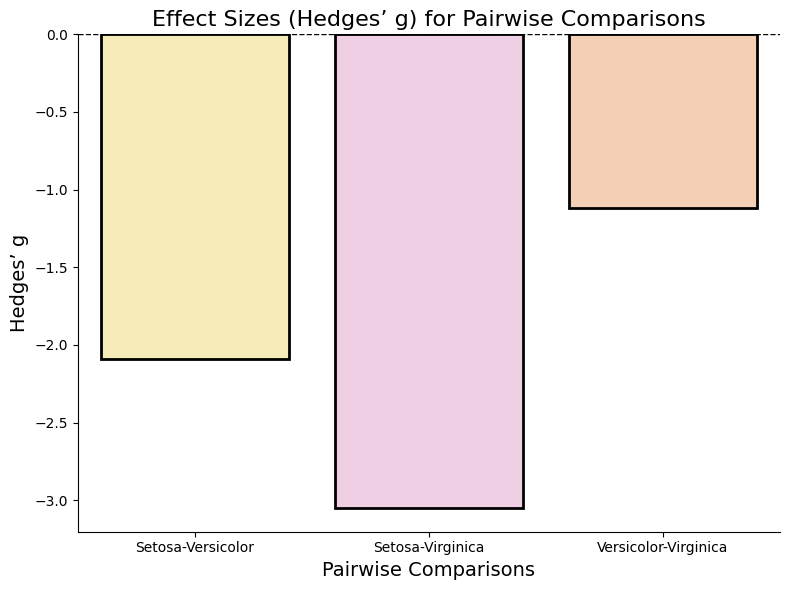

In [18]:
# Data for the bar plot
hedges = [-2.09, -3.05, -1.12]
labels = ["Setosa-Versicolor", "Setosa-Virginica", "Versicolor-Virginica"]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=hedges, hue=labels, palette="Pastel2_r", edgecolor='k', linewidth=2)

# Add a horizontal line at 0
plt.axhline(0, color='black', linewidth=1, linestyle="--")

# Customize the plot
plt.title("Effect Sizes (Hedges’ g) for Pairwise Comparisons", fontsize=16)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Hedges’ g", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

